In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("./data/CNDtrain.csv") 

In [3]:
df.head()

,fileName,MessageID,CND
0,CN0CN7X8FCP0074B02FNA10,SWC1902 RAC0182 LOG007 DIS001 HWC2005 SEC0031 ...,1
1,CN0CN7X8FCP0074H032SA10,SWC1902 RAC0182 LOG007 DIS001 HWC2005 SEC0031 ...,1
2,CN0CN7X8FCP0078I00KUA10,SWC1902 RAC0182 LOG007 DIS001 HWC2005 SEC0031 ...,1
3,CN0CN7X8FCP0059801KWA10,SWC1902 RAC0182 LOG007 DIS001 HWC2005 SEC0031 ...,1
4,CN0KX11MFCP0081900A3A10,SWC1902 RAC0182 LOG007 DIS001 HWC2005 SEC0031 ...,1


In [4]:
df.tail()

,fileName,MessageID,CND
402,CN08CYF7FCP0086U0297A04,SYS1003 UEFI0061 UEFI0062 UEFI0065 SYS1003 SYS...,0
403,CN072T6DFCP0065I00UZA10,SYS1003 LOG007 UEFI0061 UEFI0062 SYS1001 SYS10...,0
404,CN0923K0FCP0088N00E2A00,SYS1003 UEFI0061 UEFI0062 UEFI0064 SYS1003 SYS...,0
405,CN0923K0FCP0091401CNA00,SYS1003 UEFI0061 UEFI0062 SYS1003 SYS1001 RAC0...,0
406,CN00WGD1FCP0087I01ICA04,SYS1003 UEFI0157 SYS1003 SYS1001 SYS1000 SYS10...,0


In [5]:
# df_test = pd.read_csv("./data/CNDtest.csv") 

df_test = pd.read_csv("./data/CND2023.csv") 

In [6]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt


In [7]:
trancatedSVD = TruncatedSVD(n_components=2, random_state=42)


In [8]:
df.groupby(['CND'])['CND'].count()

CND
0    213
1    194
Name: CND, dtype: int64

In [9]:
df_test.groupby(['CND'])['CND'].count()

CND
0    17
1    10
Name: CND, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = df["MessageID"], df_test["MessageID"], df["CND"], df_test["CND"]

In [15]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(
        encoding="uft-8",
        decode_error="ignore"
    )
    ),
    ('clf', XGBClassifier(random_state=42)),
])

In [16]:
param_grid = {
    'tfidf__max_features': [50, 100, 200, 400],
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [3, 4, 5],
    'clf__learning_rate': [0.1, 0.01, 0.001],
    'clf__subsample': [0.8, 0.9, 1.0],
    'clf__colsample_bytree': [0.8, 0.9, 1.0],
}

In [17]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=text_clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [19]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(decode_error='ignore',
                                                        encoding='uft-8')),
                                       ('clf',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=No...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'clf__colsample_bytree': [0.8, 0.9, 1.0],
                         'clf__learning_rate': [0.1, 0.01, 0.001],
                         'clf__max_depth': [3, 4, 5],
                         'clf__n_estimators': [100, 200, 300],
                         'clf__subsample': [0.8, 0.9, 1.0],
                         'tfidf__max_features': [50, 100, 200, 400]},
             scoring='accuracy')

In [20]:
grid_search.cv_results_

{'mean_fit_time': array([0.41180053, 0.59048591, 0.7993247 , 0.84933467, 0.55414867,
        0.50941167, 0.62579017, 0.66233549, 0.4106421 , 0.53649669,
        0.62076001, 0.65272875, 0.5960906 , 0.81365457, 1.01076236,
        1.03718133, 0.59462061, 0.81642179, 0.99379678, 1.05696173,
        0.60094662, 0.82937784, 0.99636607, 1.07520361, 0.76378307,
        1.04731822, 1.28809566, 1.34478898, 0.77072644, 1.07803879,
        1.29769769, 1.38757191, 0.77896166, 1.09275365, 1.33649049,
        1.43518634, 0.51185775, 0.70837064, 0.84195085, 0.86699457,
        0.51257458, 0.71166797, 0.84337468, 0.9055829 , 0.50952716,
        0.70776792, 0.86097655, 0.87349005, 0.76356292, 1.05952406,
        1.28013773, 1.35249419, 0.7485055 , 1.08029613, 1.31466007,
        1.36239452, 0.77158337, 1.09630847, 1.32567272, 1.44092717,
        0.93311834, 1.28192768, 1.58456578, 1.68515725, 0.94480128,
        1.34840155, 1.59528661, 1.73415332, 0.96920648, 1.37366977,
        1.67975955, 1.77284298,

In [21]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [22]:
print(best_params, best_score)

{'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.01, 'clf__max_depth': 4, 'clf__n_estimators': 100, 'clf__subsample': 0.8, 'tfidf__max_features': 100} 0.6486600421559772


In [23]:
grid_search.best_estimator_.__class__.__name__

'Pipeline'

In [24]:
model_dir = f'./model/{grid_search.best_estimator_.__class__.__name__}.joblib'

In [25]:
from joblib import dump, load
dump(grid_search.best_estimator_, model_dir)

['./model/Pipeline.joblib']

In [26]:
clf = load(model_dir) 

In [30]:
X_train_pred = clf.predict(X_train)

In [31]:
X_test_pred = clf.predict(X_test)

In [32]:
X_train_acc = accuracy_score(y_train, X_train_pred)

In [33]:
X_test_acc = accuracy_score(y_test, X_test_pred)

In [34]:
X_train_acc

0.9017199017199017

In [35]:
X_test_acc

0.5185185185185185

In [36]:
# Fit and transform your data
reduced_data = trancatedSVD.fit_transform(X_train_vec)

NameError: name 'X_train_vec' is not defined

In [73]:
reduced_data_test = trancatedSVD.transform(X_test_vec)

In [48]:
trancatedSVD.explained_variance_ratio_

array([0.03035716, 0.13155361])

In [127]:
# https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/

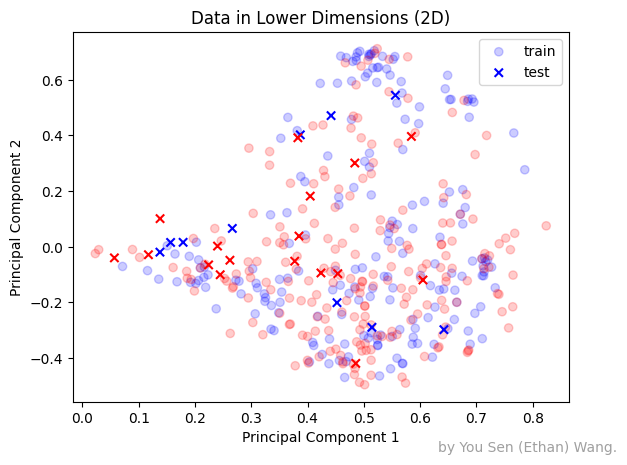

In [172]:
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_train, cmap=cm_bright, alpha=0.2)
plt.scatter(reduced_data_test[:, 0], reduced_data_test[:, 1], c=y_test, cmap=cm_bright, marker="x")
plt.legend(["train", "test"])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data in Lower Dimensions (2D)')
plt.text(0.95, -0.75, 'by You Sen (Ethan) Wang.',
             fontsize=10, color='gray',
             ha='right', va='bottom', alpha=0.75)
plt.savefig("./charts/train vs test.png")
plt.show()

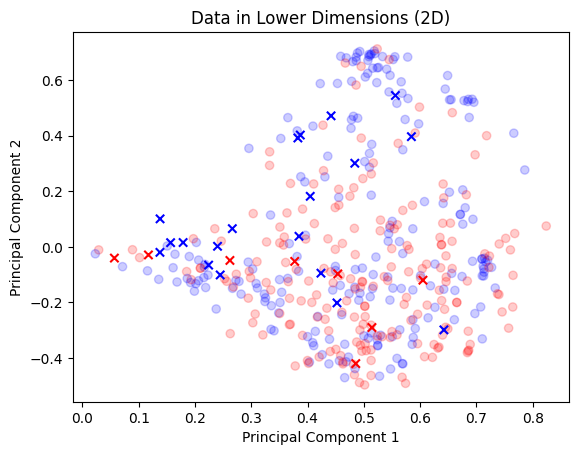

In [114]:

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=X_train_pred, cmap=cm_bright, alpha=0.2)
plt.scatter(reduced_data_test[:, 0], reduced_data_test[:, 1], c=X_test_pred, cmap=cm_bright, marker="x")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data in Lower Dimensions (2D)')
plt.show()

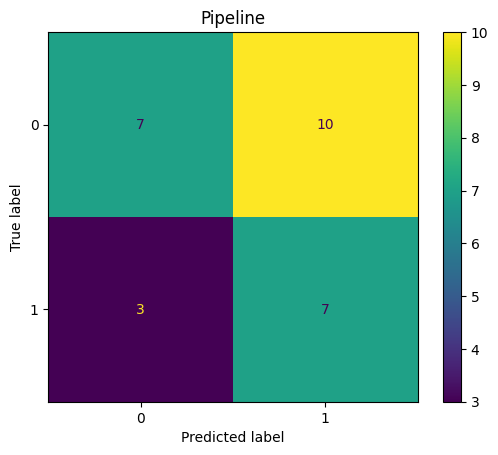

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


cm = confusion_matrix(y_test, X_test_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title(grid_search.best_estimator_.__class__.__name__)
plt.savefig(f"./charts/{grid_search.best_estimator_.__class__.__name__}Confusion_Matrix.png")

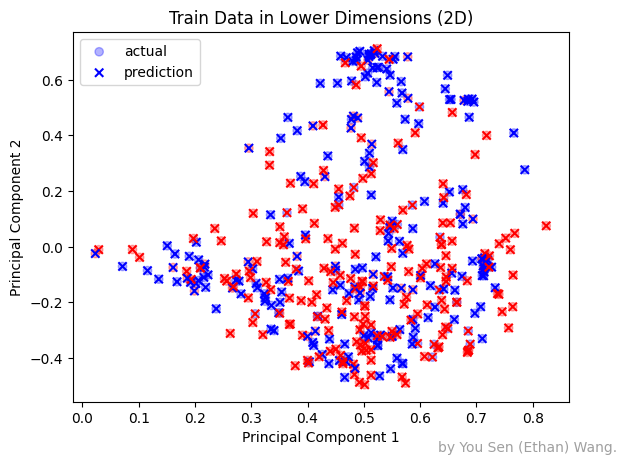

In [173]:
import matplotlib.pyplot as plt
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_train, cmap=cm_bright, alpha=0.3)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=X_train_pred, cmap=cm_bright, marker="x")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Train Data in Lower Dimensions (2D)')
plt.legend(["actual", "prediction"])
plt.text(0.95, -0.75, 'by You Sen (Ethan) Wang.',
             fontsize=10, color='gray',
             ha='right', va='bottom', alpha=0.75)
plt.savefig(f"./charts/{grid_search.best_estimator_.__class__.__name__}train_actual_vs_pred.png")
plt.show()

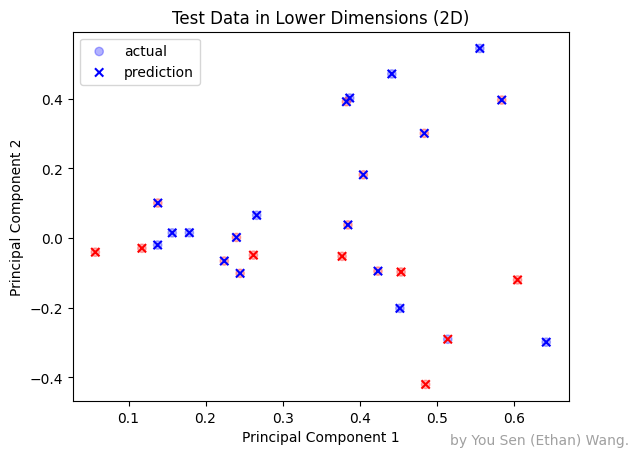

In [174]:
import matplotlib.pyplot as plt
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.scatter(reduced_data_test[:, 0], reduced_data_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3)
plt.scatter(reduced_data_test[:, 0], reduced_data_test[:, 1], c=X_test_pred, cmap=cm_bright, marker="x")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Test Data in Lower Dimensions (2D)')
plt.legend(["actual", "prediction"])
plt.text(0.75, -0.6, 'by You Sen (Ethan) Wang.',
             fontsize=10, color='gray',
             ha='right', va='bottom', alpha=0.75)
plt.savefig(f"./charts/{grid_search.best_estimator_.__class__.__name__}test_actual_vs_pred.png")
plt.show()

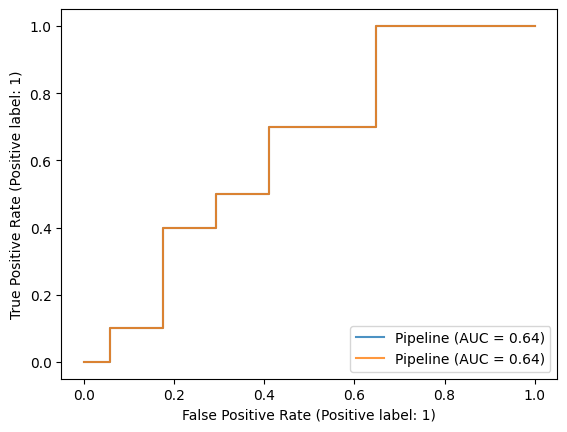

In [45]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)

In [38]:
from sklearn.metrics import f1_score
f1_score(y_test, X_test_pred)

0.5185185185185185

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, X_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.41      0.52        17
           1       0.41      0.70      0.52        10

    accuracy                           0.52        27
   macro avg       0.56      0.56      0.52        27
weighted avg       0.59      0.52      0.52        27



In [44]:
grid_search.best_estimator_.classes_

array([0, 1])

In [40]:
pd.Series(grid_search.best_estimator_.feature_importances_, index = vectorizer.get_feature_names_out()).nlargest(12).plot(kind = 'barh',
                                                                               figsize = (10, 10),
                                                                              title = 'Feature importance from XGBoost').invert_yaxis();

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [108]:
# https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#building-a-pipeline

In [109]:
from keras.models import Sequential
from keras.layers import Dense

2023-10-12 16:17:23.228709: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 16:17:23.268716: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 16:17:23.270092: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-12 16:17:24.012420: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [110]:
pip show scikit-learn

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: sentence-transformers
Note: you may need to restart the kernel to use updated packages.
